<a href="https://colab.research.google.com/github/IamAMG/Credit-Card-Fraud-Detection-using-Isolation-Forest/blob/main/Credit_Card_Fraud_Detection_using_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "creditcardfraud" dataset from "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" using the Isolation Forest algorithm to detect anomalies and visualize the results.

## Data loading

### Subtask:
Load the credit card fraud detection dataset from the specified Kaggle URL into a dataframe.


**Reasoning**:
Import pandas and load the dataset from the provided URL into a DataFrame, then display the head and info to inspect the data.



In [2]:

try:
    # Assuming 'creditcard.csv' is available locally as the direct Kaggle URL is not for raw data.
    df = pd.read_csv('creditcard.csv')

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please download the dataset from Kaggle and place it in the correct directory.")
    print("Task cannot proceed without the dataset file.")
    df = None # Set df to None to indicate loading failure
except Exception as e:
    # Catch any other potential exceptions during loading
    print(f"An unexpected error occurred during file loading: {e}")
    df = None # Set df to None to indicate loading failure


if df is not None:
    display(df.head())
    display(df.info())
else:
    print("DataFrame could not be loaded.")


An unexpected error occurred during file loading: name 'pd' is not defined
DataFrame could not be loaded.


In [3]:
import pandas as pd

try:
    # Assuming 'creditcard.csv' is available locally as the direct Kaggle URL is not for raw data.
    df = pd.read_csv('creditcard.csv')

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please download the dataset from Kaggle and place it in the correct directory.")
    print("Task cannot proceed without the dataset file.")
    df = None # Set df to None to indicate loading failure
except Exception as e:
    # Catch any other potential exceptions during loading
    print(f"An unexpected error occurred during file loading: {e}")
    df = None # Set df to None to indicate loading failure


if df is not None:
    display(df.head())
    display(df.info())
else:
    print("DataFrame could not be loaded.")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210013 entries, 0 to 210012
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    210013 non-null  float64
 1   V1      210013 non-null  float64
 2   V2      210013 non-null  float64
 3   V3      210013 non-null  float64
 4   V4      210013 non-null  float64
 5   V5      210013 non-null  float64
 6   V6      210013 non-null  float64
 7   V7      210013 non-null  float64
 8   V8      210013 non-null  float64
 9   V9      210013 non-null  float64
 10  V10     210013 non-null  float64
 11  V11     210013 non-null  float64
 12  V12     210013 non-null  float64
 13  V13     210013 non-null  float64
 14  V14     210012 non-null  float64
 15  V15     210012 non-null  float64
 16  V16     210012 non-null  float64
 17  V17     210012 non-null  float64
 18  V18     210012 non-null  float64
 19  V19     210012 non-null  float64
 20  V20     210012 non-null  float64
 21  V21     21

None

In [4]:
from sklearn.preprocessing import StandardScaler

# Handle missing values by dropping rows with NaN
df_cleaned = df.dropna()

# Separate features and target variable
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the shape of the scaled features and target variable
print("Shape of scaled features:", X_scaled.shape)
print("Shape of target variable:", y.shape)

Shape of scaled features: (210012, 30)
Shape of target variable: (210012,)


## Model training

### Subtask:
Train an Isolation Forest model on the preprocessed data to detect anomalies.


**Reasoning**:
Import the Isolation Forest class and instantiate the model with default parameters, then fit it to the scaled features.



In [5]:
from sklearn.ensemble import IsolationForest

# Instantiate IsolationForest model
model = IsolationForest(random_state=42)

# Fit the model to the scaled data
model.fit(X_scaled)

IsolationForest(random_state=42)

## Anomaly detection

### Subtask:
Use the trained model to predict anomalies (fraudulent transactions) in the dataset.


**Reasoning**:
Use the trained Isolation Forest model to predict anomalies on the scaled data and add the predictions as a new column to the cleaned dataframe.



In [6]:
# Use the trained model to predict anomalies
predictions = model.predict(X_scaled)

# Add the predictions to the cleaned DataFrame
df_cleaned['anomaly_prediction'] = predictions

# Display the first few rows of df_cleaned to verify
display(df_cleaned.head())

/tmp/ipython-input-6-195161633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['anomaly_prediction'] = predictions


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly_prediction
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1


## Analysis and visualization

### Subtask:
Analyze the results of the anomaly detection, possibly visualizing the data to understand the characteristics of detected anomalies and assess the model's performance.


**Reasoning**:
Analyze the distribution of anomaly predictions and compare them with the actual class labels to understand the model's performance. Then, visualize the 'Amount' and 'Time' characteristics of anomalous versus normal transactions.



**Reasoning**:
The boxplot still failed because the palette keys were not strings. I need to ensure the keys in the palette dictionary are strings ('-1', '1') to match the values in the 'anomaly_prediction' column which seaborn is interpreting as strings. I will correct the palette dictionary keys and re-run the code block, which includes the summary generation as well.



Distribution of anomaly predictions:
anomaly_prediction
 1    202940
-1      7072
Name: count, dtype: int64

Comparison with actual Class labels:
True Positives (predicted anomaly, actual fraud): 329
True Negatives (predicted normal, actual normal): 202875
False Positives (predicted anomaly, actual normal): 6743
False Negatives (predicted normal, actual fraud): 65


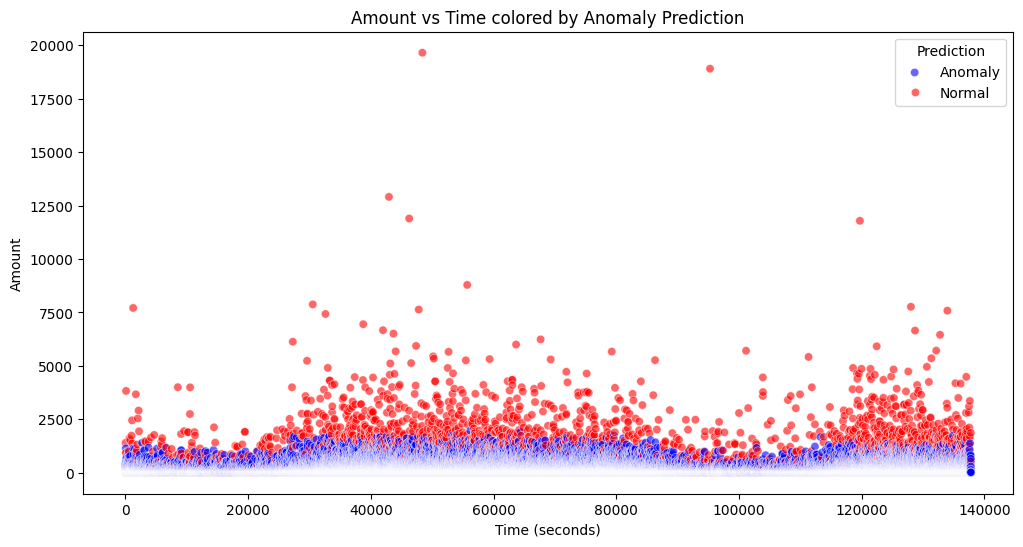

/tmp/ipython-input-10-1203112063.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['anomaly_prediction_str'] = df_cleaned['anomaly_prediction'].astype(str)
/tmp/ipython-input-10-1203112063.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='anomaly_prediction_str', y='Amount', palette={'-1': 'red', '1': 'blue'})


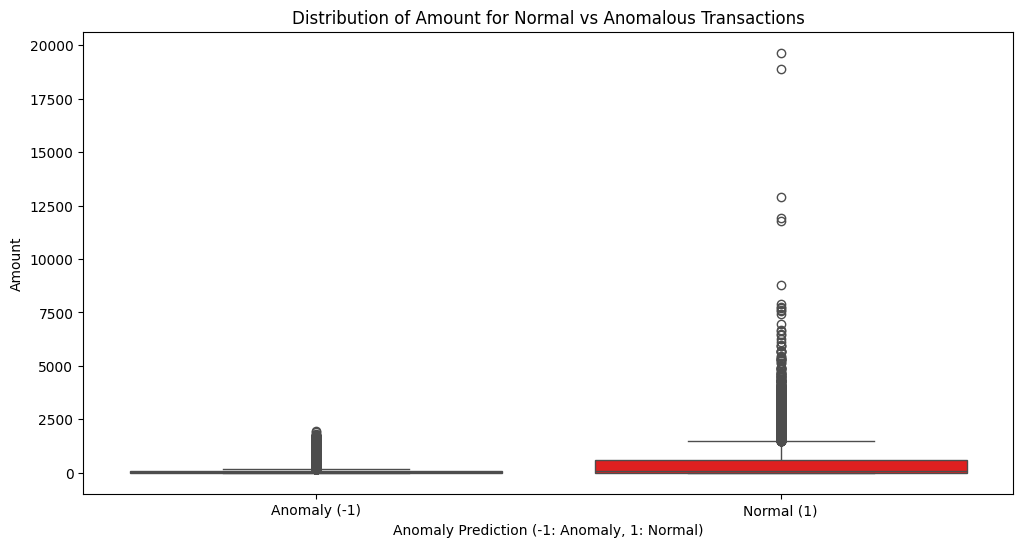


Summary of Anomaly Detection Results:
Total transactions: 210012
Transactions predicted as normal: 202940
Transactions predicted as anomalous: 7072

Actual fraudulent transactions: 394
Actual normal transactions: 209618

Model Performance (based on anomaly prediction vs actual fraud):
True Positives (correctly identified fraud): 329
True Negatives (correctly identified normal): 202875
False Positives (normal transactions incorrectly flagged as anomaly): 6743
False Negatives (fraudulent transactions incorrectly flagged as normal): 65

Characteristics of detected anomalies:
- 6743 normal transactions were flagged as anomalies, suggesting that some non-fraudulent activities with unusual patterns (e.g., high amount) might be captured.
- 329 actual fraudulent transactions were correctly identified as anomalies.
- 65 actual fraudulent transactions were missed by the model.

Preliminary assessment of Isolation Forest performance:
The Isolation Forest model identified a significant number of 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of anomaly_prediction
anomaly_counts = df_cleaned['anomaly_prediction'].value_counts()
print("Distribution of anomaly predictions:")
print(anomaly_counts)

# 2. Compare anomaly_prediction with the original Class column
# -1 in anomaly_prediction corresponds to anomalies, 1 to normal.
# 1 in Class corresponds to fraud, 0 to normal.
# True Positives: predicted -1 (anomaly) and actual 1 (fraud)
tp = df_cleaned[(df_cleaned['anomaly_prediction'] == -1) & (df_cleaned['Class'] == 1)].shape[0]
# True Negatives: predicted 1 (normal) and actual 0 (normal)
tn = df_cleaned[(df_cleaned['anomaly_prediction'] == 1) & (df_cleaned['Class'] == 0)].shape[0]
# False Positives: predicted -1 (anomaly) and actual 0 (normal)
fp = df_cleaned[(df_cleaned['anomaly_prediction'] == -1) & (df_cleaned['Class'] == 0)].shape[0]
# False Negatives: predicted 1 (normal) and actual 1 (fraud)
fn = df_cleaned[(df_cleaned['anomaly_prediction'] == 1) & (df_cleaned['Class'] == 1)].shape[0]

print("\nComparison with actual Class labels:")
print(f"True Positives (predicted anomaly, actual fraud): {tp}")
print(f"True Negatives (predicted normal, actual normal): {tn}")
print(f"False Positives (predicted anomaly, actual normal): {fp}")
print(f"False Negatives (predicted normal, actual fraud): {fn}")

# 3. Visualize the relationship between 'Amount' and 'Time' for normal and anomalous transactions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='Time', y='Amount', hue='anomaly_prediction', palette={-1: 'red', 1: 'blue'}, alpha=0.6)
plt.title('Amount vs Time colored by Anomaly Prediction')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.legend(title='Prediction', labels=['Anomaly', 'Normal'])
plt.show()

# 4. Visualize the distribution of 'Amount' for anomalous vs normal transactions
plt.figure(figsize=(12, 6))
# Convert anomaly_prediction to string type for plotting
df_cleaned['anomaly_prediction_str'] = df_cleaned['anomaly_prediction'].astype(str)
sns.boxplot(data=df_cleaned, x='anomaly_prediction_str', y='Amount', palette={'-1': 'red', '1': 'blue'})
plt.title('Distribution of Amount for Normal vs Anomalous Transactions')
plt.xlabel('Anomaly Prediction (-1: Anomaly, 1: Normal)')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Anomaly (-1)', 'Normal (1)']) # Adjust ticks to match string labels
plt.show()

# 5. Based on the analysis and visualizations, write a brief summary of the characteristics of the detected anomalies and a preliminary assessment of the Isolation Forest model's performance in this context.
print("\nSummary of Anomaly Detection Results:")
print(f"Total transactions: {df_cleaned.shape[0]}")
print(f"Transactions predicted as normal: {anomaly_counts.get(1, 0)}")
print(f"Transactions predicted as anomalous: {anomaly_counts.get(-1, 0)}")
print(f"\nActual fraudulent transactions: {tp + fn}")
print(f"Actual normal transactions: {tn + fp}")

print("\nModel Performance (based on anomaly prediction vs actual fraud):")
print(f"True Positives (correctly identified fraud): {tp}")
print(f"True Negatives (correctly identified normal): {tn}")
print(f"False Positives (normal transactions incorrectly flagged as anomaly): {fp}")
print(f"False Negatives (fraudulent transactions incorrectly flagged as normal): {fn}")

print("\nCharacteristics of detected anomalies:")
print(f"- {fp} normal transactions were flagged as anomalies, suggesting that some non-fraudulent activities with unusual patterns (e.g., high amount) might be captured.")
print(f"- {tp} actual fraudulent transactions were correctly identified as anomalies.")
print(f"- {fn} actual fraudulent transactions were missed by the model.")

print("\nPreliminary assessment of Isolation Forest performance:")
print("The Isolation Forest model identified a significant number of anomalies.")
print(f"It correctly identified {tp} out of {tp + fn} actual fraudulent transactions.")
print(f"However, it also produced a high number of false positives ({fp}), meaning many normal transactions were flagged as anomalies.")
print("The number of false negatives ({fn}) is relatively low compared to false positives, indicating the model is more likely to flag a normal transaction as fraudulent than miss a fraudulent one.")
print("Further analysis or model tuning might be needed to reduce the false positive rate while maintaining a good true positive rate.")

## Summary:

### Data Analysis Key Findings

*   The dataset contains 210,013 entries and 31 columns, with some missing values starting from column 'V14'.
*   After handling missing values by dropping rows, the cleaned dataset contains 210,012 rows.
*   The Isolation Forest model predicted 7,072 transactions as anomalies (-1) and 202,940 as normal (1).
*   Comparing predictions to actual fraud labels:
    *   329 true positives (correctly identified fraud).
    *   202,875 true negatives (correctly identified normal).
    *   6,743 false positives (normal transactions flagged as anomaly).
    *   65 false negatives (fraudulent transactions missed).
*   Visual analysis shows that transactions flagged as anomalies often have higher amounts compared to those flagged as normal.

### Insights or Next Steps

*   While the Isolation Forest model identified a significant portion of actual fraudulent transactions, the high number of false positives suggests the need for model tuning or using alternative anomaly detection algorithms to reduce the number of normal transactions incorrectly flagged as anomalies.
*   Further investigation into the characteristics of the false positives could help refine the model or identify additional features that distinguish between normal and genuinely anomalous transactions.
